#  **Практическое занятие №1. Введение в машинное обучение.**

## Знакомство с библиотекой **matplotlib**

matplotlib - библиотека на python для визуализации данных.

https://matplotlib.org/stable/tutorials/introductory/pyplot.html


In [1]:
from matplotlib import pyplot as plt

# включаем интерактивную поддержку matplotlib для jupyter notebook.
%matplotlib inline

### Простые графики

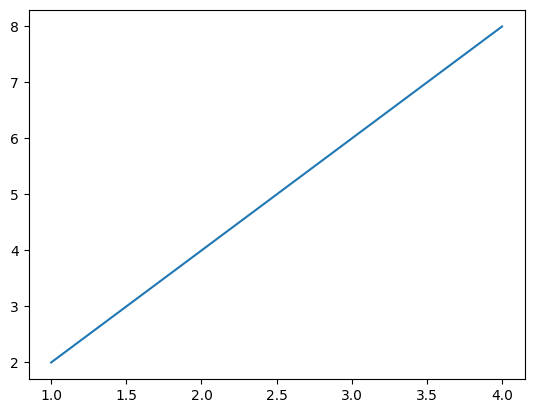

In [2]:
# нарисуем прямую с концами в (1, 2) и (4, 8)
plt.plot([1, 4], [2, 8])
plt.show()

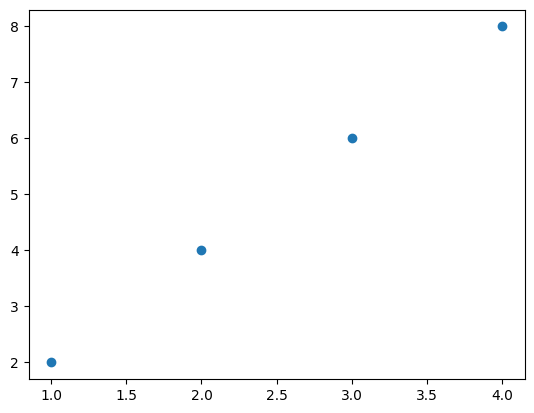

In [3]:
# нарисуем только точки с координатами (1, 2), (2, 4), (3, 6), (4, 8)
plt.scatter([1, 2, 3, 4], [2, 4, 6, 8])
plt.show()

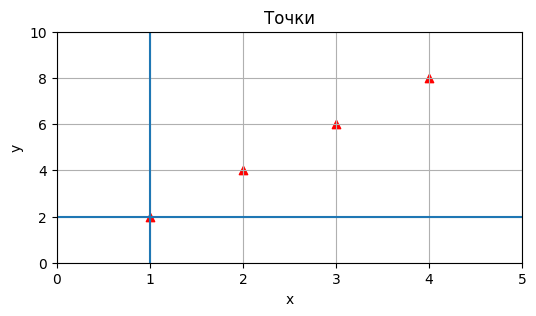

In [4]:
# немного кастомизируем наш график

# зададим размер изображения
plt.figure(figsize=(6, 3))

# зададим названия осей
plt.xlabel('x')
plt.ylabel('y')

# зададим масштаб осей
plt.xlim(0, 5)
plt.ylim(0, 10)

# выберем цвет и форму точек
plt.scatter([1, 2, 3, 4], [2, 4, 6, 8], c='r', marker='^')

# нарисуем вертикальную и горизонтальную линию
plt.axvline(1)
plt.axhline(2)

# добавим сетку
plt.grid()

# добавим название
plt.title('Точки')

plt.show()

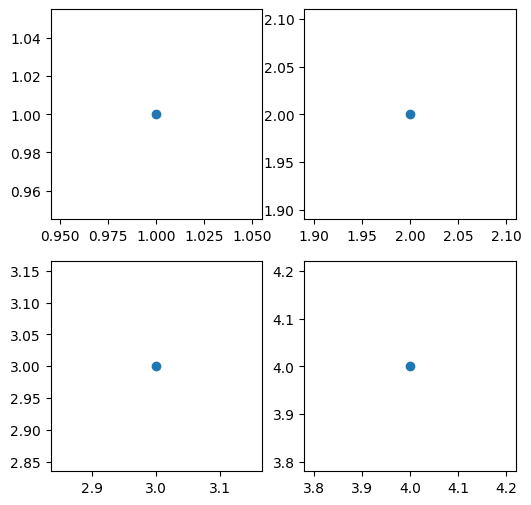

In [5]:
# можно строить несколько графиков в одной фигуре

plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.scatter([1], [1])

plt.subplot(2, 2, 2)
plt.scatter([2], [2])

plt.subplot(2, 2, 3)
plt.scatter([3], [3])

plt.subplot(2, 2, 4)
plt.scatter([4], [4])

plt.show()

Нарисуйте $y = sin(x)$, где $x \in [-0.5, 5)$ c шагом $0.1$ по $x$, таже нарисуйте красные точки на этом же графике с шагом $0.5$

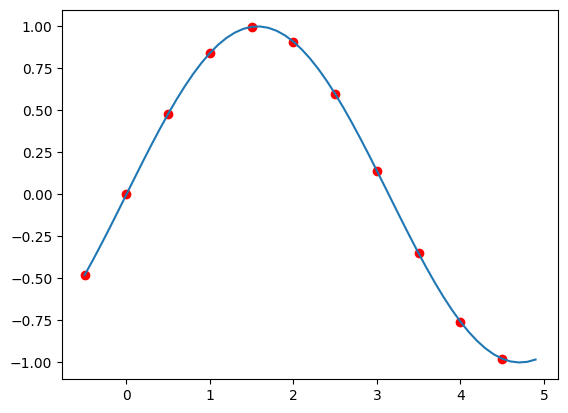

In [8]:
# Your code here
import numpy as np

x_plot = np.arange(-0.5, 5, 0.1)
y_plot = np.sin(x_plot)

x_scatter = np.arange(-0.5, 5, 0.5)
y_scatter = np.sin(x_scatter)

plt.plot(x_plot, y_plot)
plt.scatter(x_scatter, y_scatter, c='r')

plt.show()

### Диаграммы, гистограммы и др.

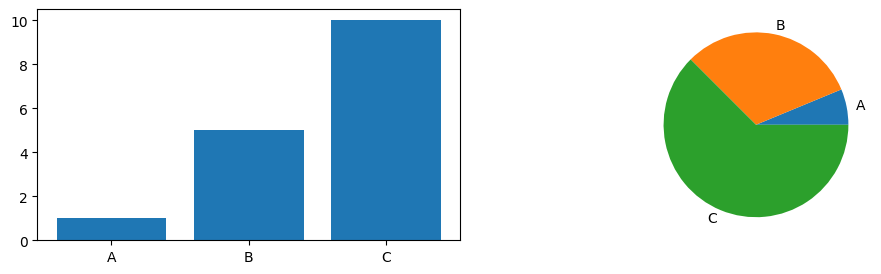

In [9]:
# можно строить различные диаграммы - столбчатые, круговые и др.

names = ['A', 'B', 'C']
values = [1, 5, 10]

plt.figure(figsize=(12, 3))

# гистограмма
plt.subplot(1, 2, 1)
plt.bar(names, values)

# круговая диаграмма
plt.subplot(1, 2, 2)
plt.pie(values, labels=names)

plt.show()

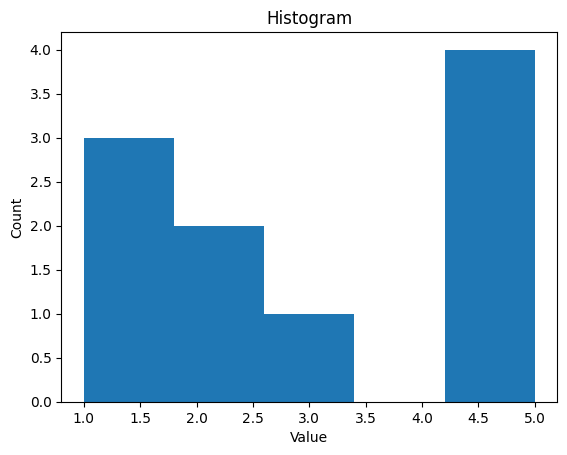

In [10]:
# очень полезно уметь рисовать гистограммы, так как это простой способ посмотреть на свои данные
values = [1, 1, 1, 2, 2, 3, 5, 5, 5, 5]

# the histogram of the data
n, bins, patches = plt.hist(values, bins=5)

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram')

plt.show()

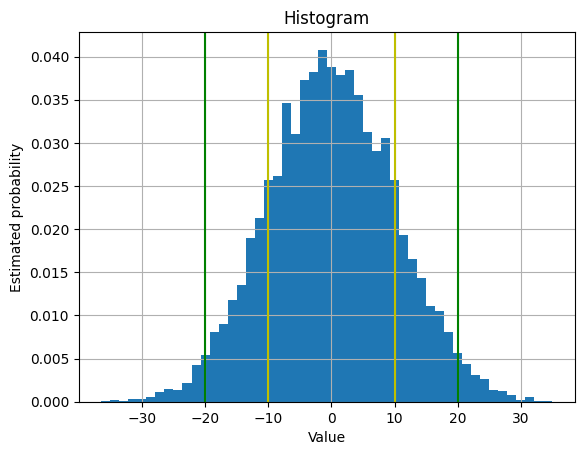

In [11]:
# нарисуем теперь гистограмму для набора случайных величин
import numpy as np

mu = 0
sigma = 10
values = np.random.normal(mu, sigma, 10000)

# the histogram of the data
plt.hist(values, bins=50, density=True)

# интересный факт: для нормального распределения примерно
# 95% выборки будут лежать между mu - 2*sigma и mu + 2*sigma
plt.axvline(x=(mu + 2 * sigma), c='g')
plt.axvline(x=(mu - 2 * sigma), c='g')

# интересный факт: для нормального распределения примерно
# 68% выборки будут лежать между mu - sigma и mu + sigma
plt.axvline(x=(mu + sigma), c='y')
plt.axvline(x=(mu - sigma), c='y')

plt.xlabel('Value')
plt.ylabel('Estimated probability')

plt.title('Histogram')
plt.grid()

plt.show()

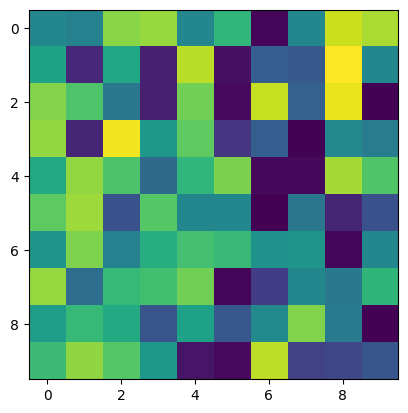

In [12]:
# также matplotlib умеет рисовать картинки
# нарисуем картинку со случайным значением каждого пикселя

plt.imshow(np.random.random((10, 10)))

plt.show()

Нарисуйте картинку 100x100, в которой будет галочка или крестик на однотонном фоне

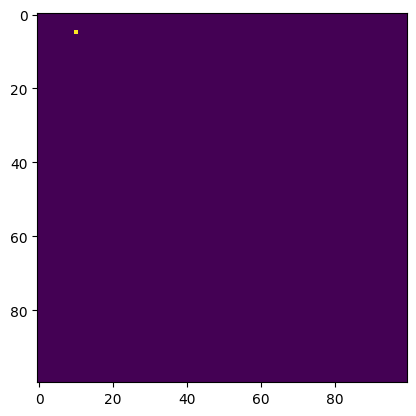

In [15]:
# Your code here
image = np.eye(100) + np.eye(100)[::-1]

image = np.zeros((100, 100))
for i in range(100):
    image[i][i] = 1

image[5][10] = 1

plt.imshow(image)

plt.show()

## Библитека **sklearn**. Примеры "игрушечных" синтетических датасетов и датасетов на реальных данных.

https://scikit-learn.org/stable/modules/classes.html#samples-generator

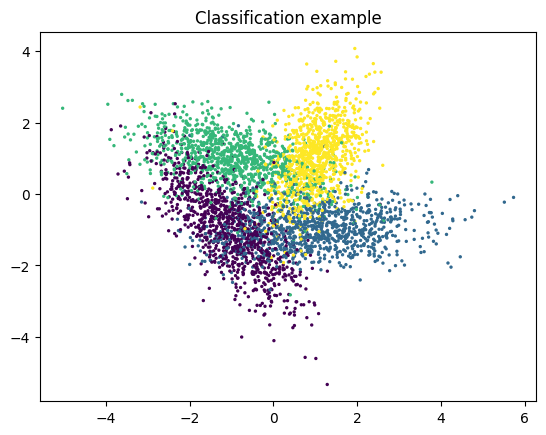

In [28]:
from sklearn import datasets

# Пример синтетического датасета для классификации
# Сгенерируем датасет с двумя фичами (x, y), где каждый пример принадлежит одному из четырёх классов
n_samples = 4000
n_classes = 4

x, y_true = datasets.make_classification(
    n_samples,
    n_classes=n_classes,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1,
    random_state=7
)

# Ещё несколько примеров для двух классов

# x, y_true = datasets.make_blobs(
#     n_samples=n_samples, centers=n_classes, cluster_std=0.60, random_state=0
# )
# x, y_true = sklearn.datasets.make_circles(
#     n_samples=n_samples, factor=0.5, noise=0.05
# )
# x, y_true = sklearn.datasets.make_moons(
#     n_samples=n_samples, noise=0.1
# )

plt.scatter(x[:,0], x[:,1], c=y_true, s=2)

plt.title("Classification example")

plt.show()

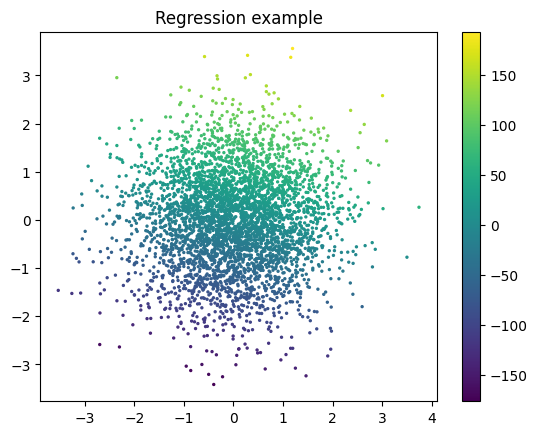

In [31]:
# Давайте сгенерируем пример для регрессии
n_samples = 4000

x, y_true = datasets.make_regression(
    n_samples,
    n_features=2,
    n_informative=2,
    random_state=7
)

plt.scatter(x[:,0], x[:,1], c=y_true, s=2)

plt.title("Regression example")
plt.colorbar()

plt.show()

## **Метод k ближайших соседей (kNN)**, реализация в библиотеке sklearn.

https://ru.wikipedia.org/wiki/Метод_k-ближайших_соседей



В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди $k$ соседей данного элемента, классы которых уже известны. В случае использования метода для регрессии, объекту присваивается среднее значение по $k$ ближайшим к нему объектам, значения которых уже известны.

**Пример**: зелёный круг нужно классифицировать как синий квадрат (класс 1) или как красный треугольник (класс 2). Если k = 3, то он классифицируется как 2-й класс, потому что внутри меньшего круга 2 треугольника и только 1 квадрат. Если k = 5, то он будет классифицирован как 1-й класс (3 квадрата против 2 треугольников внутри большего круга)

![example](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

<sub>Автор: Antti Ajanki AnAj - собственная работа, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2170282</sub>

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# help(KNeighborsClassifier)

### Тестирование метода на синтетических данных.


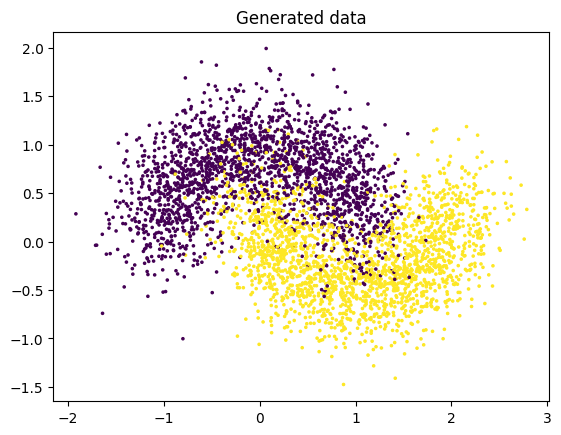

In [24]:
# Генерируем данные

n_samples = 4000

x, y_true = datasets.make_moons(
    n_samples=n_samples, noise=0.3
)

plt.scatter(x[:,0], x[:,1], c=y_true, marker=".", s=10)

plt.title("Generated data")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y_true, stratify=y_true, test_size=test_size)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_predicted = knn.predict(x_test)

### Реализуем метрики ререссии самостоятельно и сравниваем с готовыми функциями в библиотеке sklearn.

Вспомним,  какие есть метрики классификации

![](https://yastatic.net/s3/ml-handbook/admin/6_3_c4ba781675.png)

<sub>By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283</sub>




\begin{array}{|c|c|} \hline
 & y = 1 & y = 0 \\ \hline
\hat{y} = 1 & True Positive (TP) & False Positive (FP) \\ \hline
\hat{y} = 0 & False Negative (FN) & True Negative (TN) \\\hline
\end{array}

* **Аккуратнсть**

  $Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

* **Точность**

  $Precision=\frac{TP}{TP+FP}$

* **Полнота**

  $Recall=\frac{TP}{TP+FN}$

* **F-мера**

  $F\_score = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$

In [33]:
import sklearn.metrics as metrics

In [37]:
y_true = np.array([1, 0, 1, 0, 0])
y_pred = np.array([1, 1, 1, 0, 1])

In [39]:
(y_true == 1) & (y_pred == 1)

array([ True, False,  True, False, False])

In [34]:
def accuracy(y_true, y_pred):
  # your code here
  return np.sum(y_true == y_pred) / len(y_true)

assert accuracy(y_test, y_predicted) == metrics.accuracy_score(y_test, y_predicted)
print('Accuracy score is {:.2f}'.format(metrics.accuracy_score(y_test, y_predicted)))

Accuracy score is 0.90


In [40]:
def precision(y_true, y_pred):
  # your code here
  return np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_pred)

assert precision(y_test, y_predicted) == metrics.precision_score(y_test, y_predicted)
metrics.precision_score(y_test, y_predicted)

0.9011725293132329

In [41]:
def recall(y_true, y_pred):
  # your code here
  return np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_true)

assert recall(y_test, y_predicted) == metrics.recall_score(y_test, y_predicted)
metrics.recall_score(y_test, y_predicted)

0.8966666666666666

In [ ]:
def f_score(y_true, y_pred):
  # your code here
  return

assert f_score(y_test, y_predicted) == metrics.f1_score(y_test, y_predicted)
print('F-score score is {:.2f}'.format(metrics.f1_score(y_test, y_predicted)))

### Датасет Ирисы Фишера, тестирование метода kNN на нём.

https://ru.wikipedia.org/wiki/Ирисы_Фишера

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

*   Длина наружной доли околоцветника (англ. sepal length);
*   Ширина наружной доли околоцветника (англ. sepal width);
*   Длина внутренней доли околоцветника (англ. petal length);
*   Ширина внутренней доли околоцветника (англ. petal width).

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [43]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [44]:
x = iris.data
y = iris.target

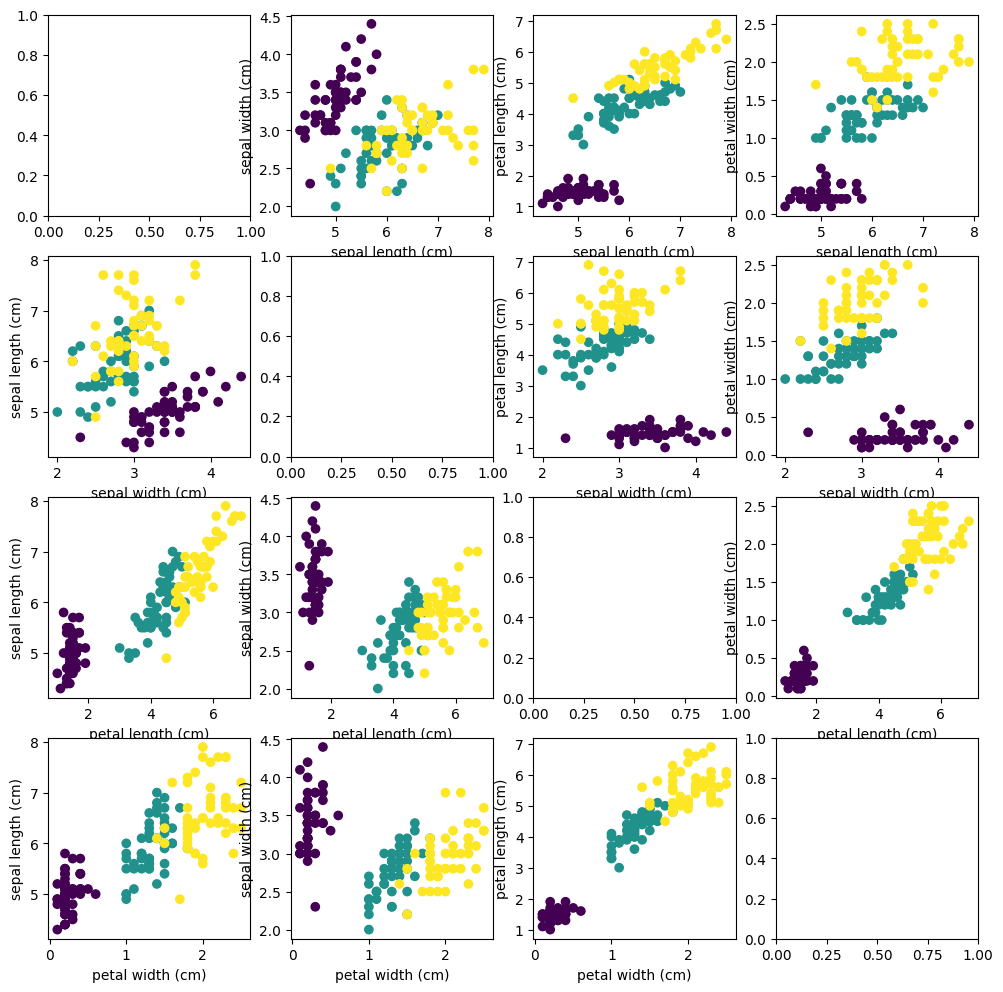

In [45]:
plt.figure(figsize=(12, 12))

for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        if (i != j):
            plt.scatter(x[:,i], x[:,j], c=y)
            plt.xlabel(iris.feature_names[i])
            plt.ylabel(iris.feature_names[j])

plt.show()

In [ ]:
%pip install seaborn

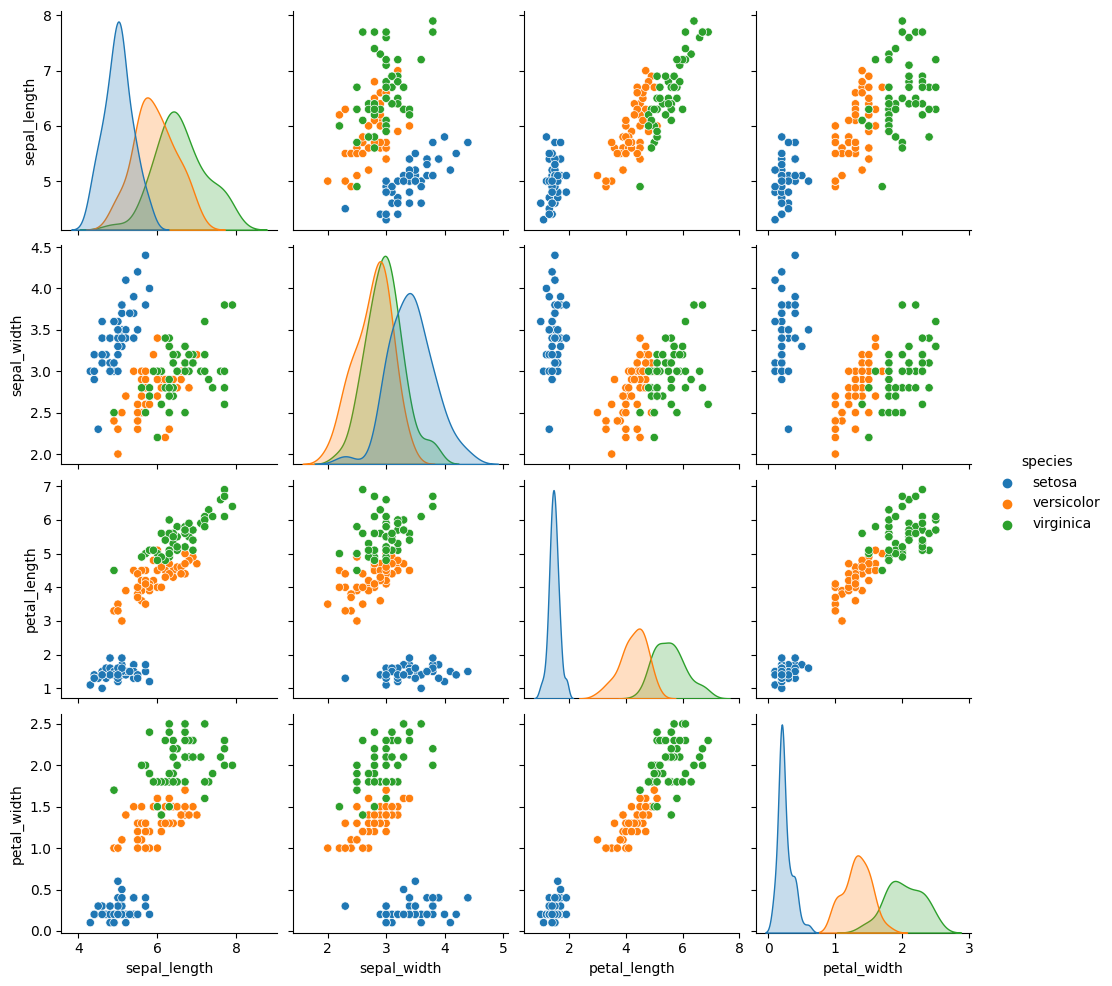

In [47]:
# это можно нарисовать используя только matplotlib, но мы для простоты воспользуемся seaborn
# (https://seaborn.pydata.org/generated/seaborn.pairplot.html)

import seaborn

iris_df = seaborn.load_dataset("iris")
seaborn.pairplot(iris_df, hue="species")

Воспользуемся kNN для классификации ирисов

In [48]:
# Your code here

test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=test_size)

In [49]:
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn_iris.predict(x_test)

In [52]:
metrics.precision_score(y_test, y_pred)

ValueError: ignored